In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# -LOAD CSV -
df = pd.read_csv("health_data.csv")

# - FEATURES & TARGET -
feature_cols = [
    "age", "sugar_cravings", "irregular_periods", "weight_gain", "neck_swelling",
    "thirst", "frequent_urination", "dark_patches", "acne", "excess_hair",
    "family_history", "fatigue", "stress_level"
]

X = df[feature_cols]
y = df["label"]

# - ENCODE LABELS -
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts strings to numbers

# - SPLIT DATA -
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ---------------- TRAIN MODEL ----------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ---------------- EVALUATE ----------------
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", round(accuracy * 100, 2), "%")



Model Accuracy: 99.0 %


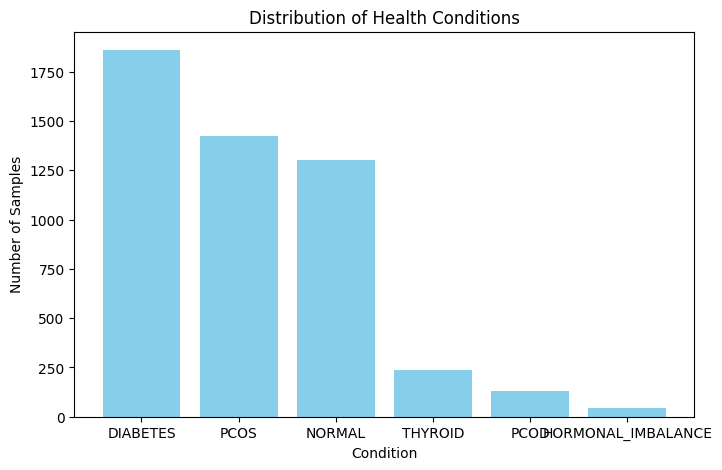

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("health_data.csv")

labels_count = df['label'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(labels_count.index, labels_count.values, color='skyblue')
plt.title("Distribution of Health Conditions")
plt.xlabel("Condition")
plt.ylabel("Number of Samples")
plt.show()


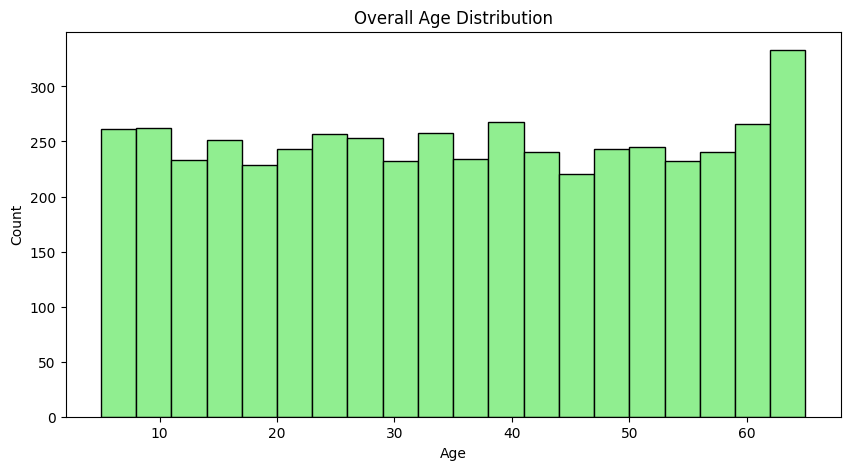

In [13]:
#age distribution
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Overall Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


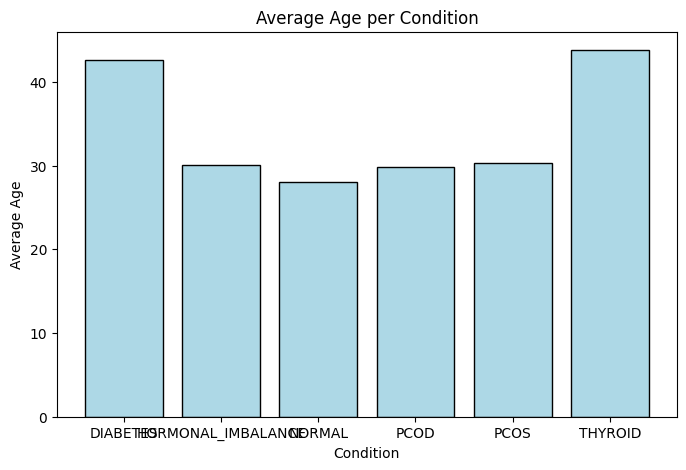

In [ ]:

# age vs condition

# Calculate average age per condition
avg_age = df.groupby('label')['age'].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_age.index, avg_age.values, color='lightblue', edgecolor='black')
plt.title("Average Age per Condition")
plt.xlabel("Condition")
plt.ylabel("Average Age")
plt.show()


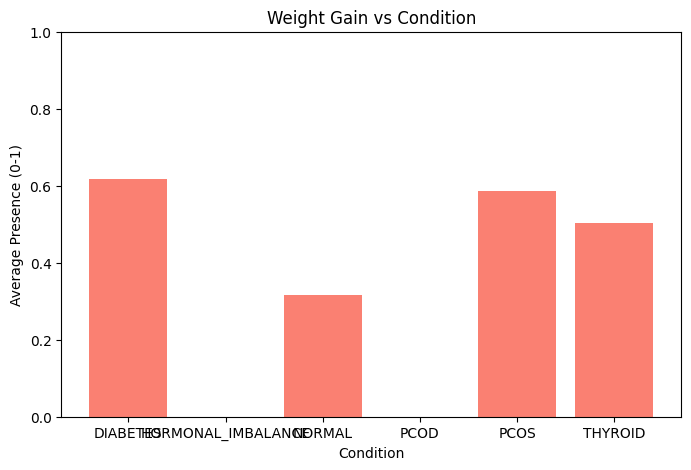

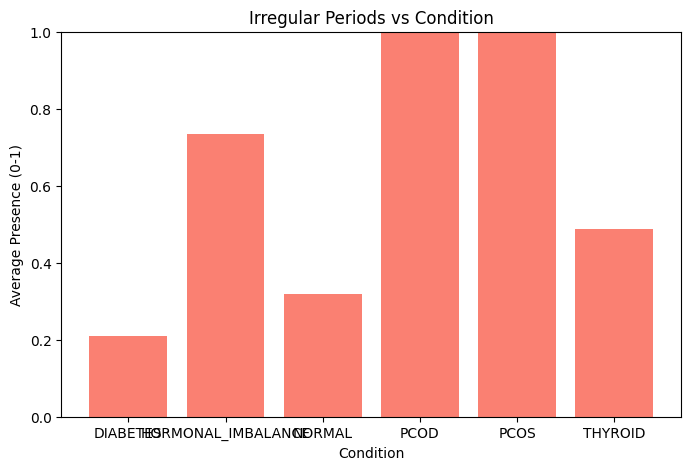

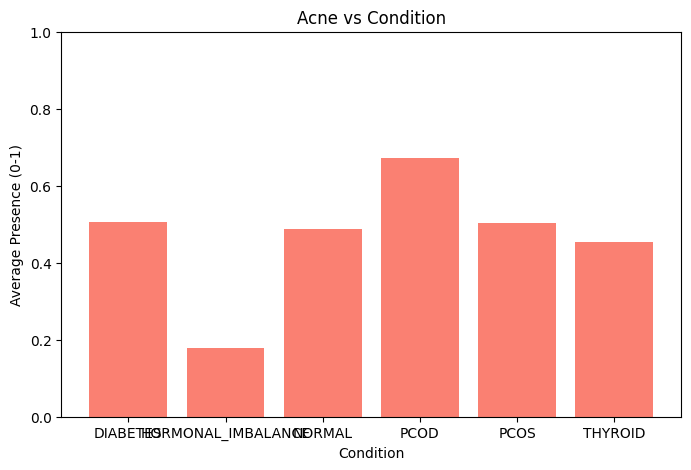

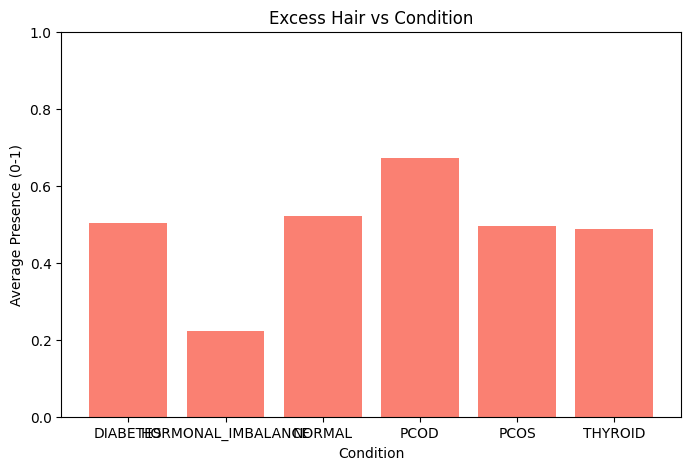

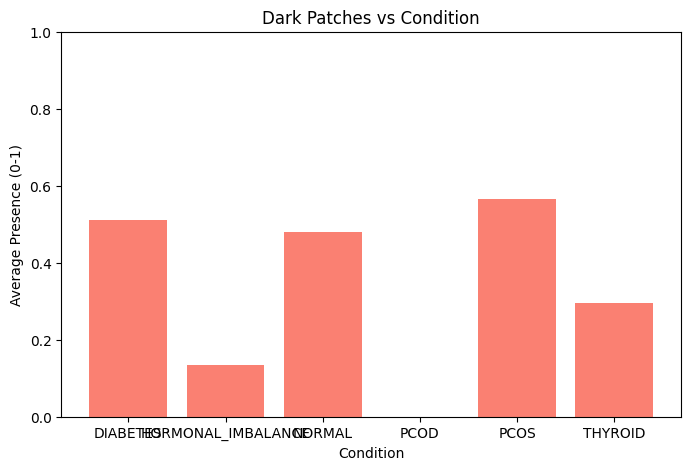

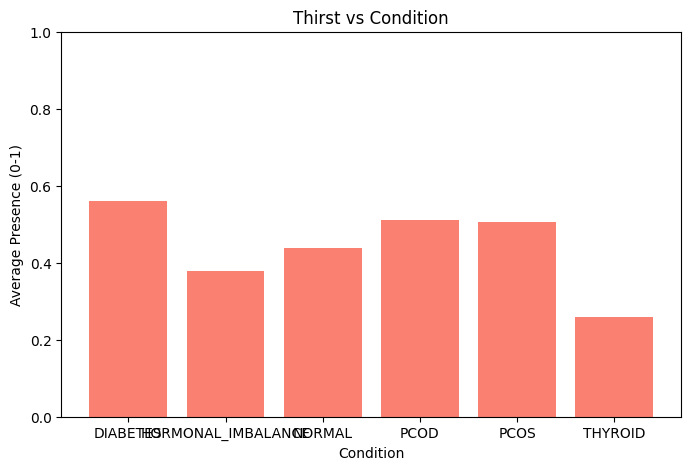

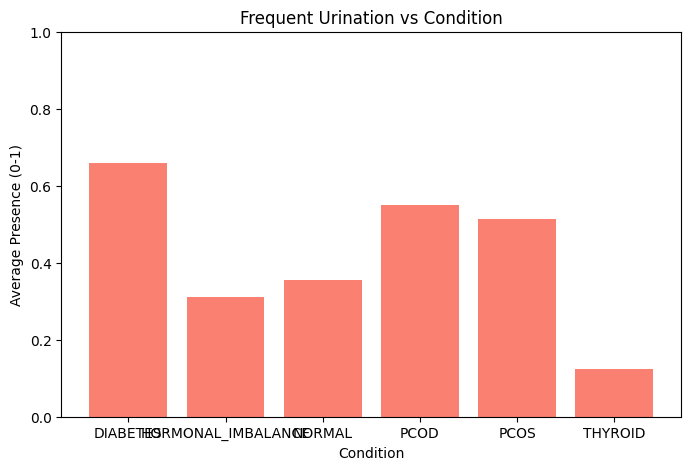

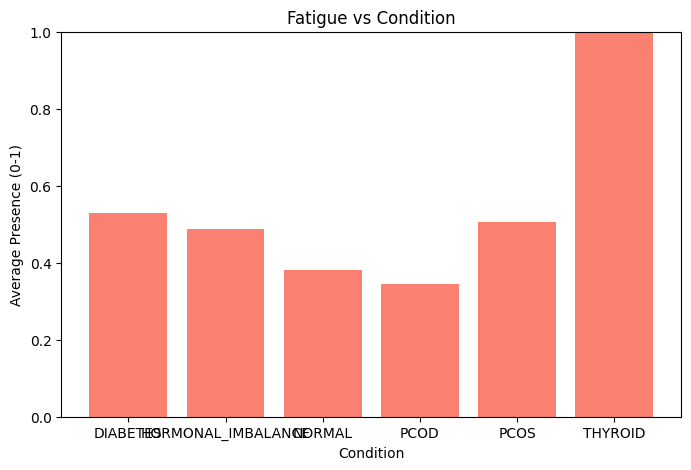

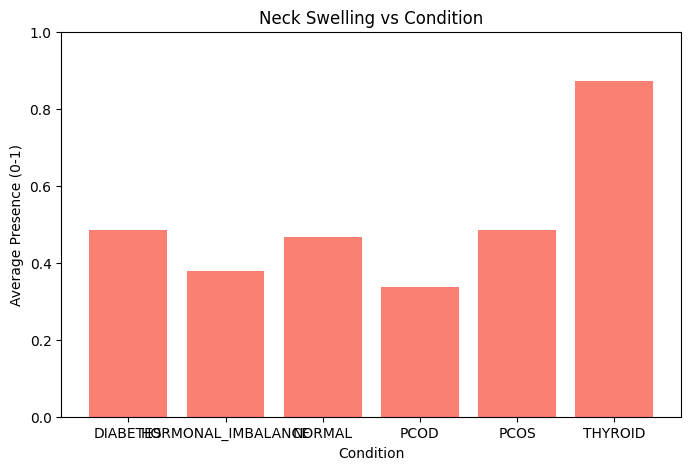

In [ ]:

# symptoms vs condtiion
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("health_data.csv")

# List of symptoms
symptoms = [
    "weight_gain", "irregular_periods", "acne", "excess_hair",
    "dark_patches", "thirst", "frequent_urination", "fatigue","neck_swelling"
]

# Loop through each symptom and plot separately
for symptom in symptoms:
    symptom_data = df.groupby('label')[symptom].mean()  # average presence per condition
    
    plt.figure(figsize=(8,5))
    plt.bar(symptom_data.index, symptom_data.values, color='salmon')
    plt.title(f"{symptom.replace('_', ' ').title()} vs Condition")
    plt.xlabel("Condition")
    plt.ylabel("Average Presence (0-1)")
    plt.ylim(0,1)
    plt.show()


In [ ]:

from sklearn.ensemble import RandomForestClassifier

# ---------------- Load CSV and train model ----------------
df = pd.read_csv("health_data.csv")

# Features and target
feature_cols = [
    "age", 
    "weight_gain", "irregular_periods", "acne", "excess_hair",
    "dark_patches", "thirst", "frequent_urination", "fatigue",
    "family_history", "stress_level","sugar_cravings","neck_swelling"
]


X = df[feature_cols]
y = df['label']

# Encode labels if they are strings
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X, y_encoded)





,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import numpy as np
from rapidfuzz import fuzz
import threading
import math

app = Flask(__name__)
CORS(app)

# ---------- Water Function ----------
def water_intake(weight):
    try:
        # Multiply by 0.033 and round UP to nearest whole liter
        liters = math.ceil(float(weight) * 0.033)
        return f"{liters} liters per day"
    except:
        return "2-3 liters per day"
# ---------- Lifestyle ----------
def lifestyle_by_age(age):
    age = int(age)
    if age < 18:
        return ["Eat on time", "Limit junk food", "Sleep well"]
    elif age <= 30:
        return ["Exercise daily", "Manage stress", "Avoid late-night eating"]
    elif age <= 45:
        return ["Avoid sugar", "Follow routine", "Stay active"]
    else:
        return ["Light exercise", "Good digestion", "Proper sleep"]




In [18]:

# ---------- Food Dictionaries ----------
FOODS = {
    "PCOD": {
        "message": "Based on what you shared, your body shows signs of PCOD. Food and lifestyle changes can help manage these symptoms naturally.",
    "vegetables": [
        "Spinach helps balance hormones and improves blood health in PCOD.",
        "Broccoli helps reduce hormonal imbalance in PCOD.",
        "Carrot helps detox the body and supports hormone balance in PCOD.",
        "Cucumber reduces bloating and keeps the body cool in PCOD.",
        "Pumpkin supports digestion and helps hormone balance in PCOD."
    ],
    "fruits": [
        "Apple helps control insulin levels and reduce PCOD symptoms.",
        "Berries reduce inflammation and support hormone health in PCOD.",
        "Papaya improves digestion and reduces bloating in PCOD.",
        "Orange boosts immunity and reduces stress linked to PCOD.",
        "Pear helps balance hormones and improve digestion in PCOD.",
        "Watermelon helps reduce bloating and keeps the body hydrated."
    ],
    "seeds":[
        "Pumpkin seeds – helps balance hormones in PCOD",
        "Flaxseeds – regulates estrogen and supports insulin sensitivity",
        "Chia seeds – controls blood sugar and supports weight management",
        "Fenugreek seeds – improves insulin function and metabolism",
        "Sesame seeds – supports thyroid and hormone health",
        "Hemp seeds – protein-rich to boost energy and satiety"
     ],
    "avoid": [
        "Sugary foods increase insulin and worsen PCOD symptoms.",
        "Maida foods disturb hormones and increase PCOD problems.",
        "Fried and fast food increase weight and hormone imbalance in PCOD.",
        "Cool drinks increase sugar levels and worsen PCOD."
    ],
    "exercise": [
        "Brisk walking",
        "Yoga and stretching",
        "Surya Namaskar"
    ],
    "lifestyle": [
        "Reduce stress",
        "Sleep 7–8 hours",
        "Avoid late-night eating"
    ]
    },
    "HORMONAL_IMBALANCE":{"message": "Based on what you shared, your body shows signs of hormonal imbalance. Food and lifestyle changes can help manage these symptoms naturally.",
    "vegetables": [
        "Spinach supports hormone balance.",
        "Broccoli helps remove excess hormones.",
        "Carrot supports detoxification.",
        "Cucumber reduces bloating.",
        "Pumpkin supports digestion."
    ],
    "fruits": [
        "Apple helps regulate insulin.",
        "Papaya improves digestion.",
        "Berries reduce inflammation.",
        "Pear supports hormone balance.",
        "Orange reduces stress."
    ],
    "seeds":[
        "Flaxseeds – helps regulate estrogen and hormone balance",
        "Pumpkin seeds – zinc-rich for hormone regulation",
        "Chia seeds – supports insulin and hormonal stability",
        "Fenugreek seeds – improves metabolic function and hormones",
        "Hemp seeds – protein and healthy fats for hormone production",
        "Sesame seeds – aids in overall hormonal balance"
     ]
    },
    "PCOS": {
        "message": "Your symptoms suggest patterns linked with hormone and metabolism imbalance. Proper food control and regular activity are very important.",
    "vegetables": [
        "Spinach supports hormone balance and improves iron levels in PCOS.",
        "Broccoli helps remove excess hormones in PCOS.",
        "Carrot supports detoxification and hormone health in PCOS.",
        "Cucumber reduces inflammation and bloating in PCOS.",
        "Pumpkin supports digestion and hormonal balance in PCOS."
    ],
    "fruits": [
        "Apple helps control blood sugar and insulin resistance in PCOS.",
        "Berries reduce inflammation and support hormone balance in PCOS.",
        "Papaya improves digestion and supports regular cycles in PCOS.",
        "Orange reduces stress and boosts immunity in PCOS.",
        "Pear helps control insulin and balance hormones in PCOS.",
        "Watermelon helps hydration and reduces bloating in PCOS."
    ],
    "seeds":[
        "Pumpkin seeds – helps balance hormones in PCOS",
        "Flaxseeds – regulates estrogen levels and insulin",
        "Chia seeds – aids in blood sugar control and weight management",
        "Fenugreek seeds – improves insulin sensitivity and metabolic health",
        "Sesame seeds – supports thyroid and hormone function",
        "Hemp seeds – protein-rich for energy and satiety"
     ],
    "avoid": [
        "Sugary foods increase insulin resistance in PCOS.",
        "Maida foods increase weight and hormone imbalance in PCOS.",
        "Fried and fast food increase inflammation in PCOS.",
        "Cool drinks raise sugar levels and worsen PCOS symptoms."
    ],
    "exercise": [
        "Cardio workouts",
        "Strength training",
        "Yoga"
    ],
    "lifestyle": [
        "Maintain healthy weight",
        "Follow regular routine",
        "Limit junk food"
    ]
        
    },
    "DIABETES": {
        "message": "Your symptoms indicate difficulty in blood sugar control. Choosing the right food and staying active can help manage this condition.",
    "vegetables": [
        "Spinach helps control blood sugar and improves overall health.",
        "Broccoli improves insulin sensitivity.",
        "Carrot is safe in moderation.",
        "Cucumber keeps the body hydrated.",
        "Pumpkin supports digestion when eaten moderately."
    ],
    "fruits": [
        "Apple helps control blood sugar.",
        "Berries are low in sugar.",
        "Papaya is safe in moderation.",
        "Orange in small amounts.",
        "Pear helps control blood sugar.",
        "Watermelon in small portions."
    ],
     "seeds":[
        "Sesame seeds – supports thyroid hormone function",
        "Flaxseeds – anti-inflammatory and hormone-regulating",
        "Pumpkin seeds – zinc-rich, helps thyroid health",
        "Hemp seeds – protein-rich to support metabolism",
        "Sunflower seeds – vitamin E and selenium for thyroid support",
        "Chia seeds – overall metabolic support"
     ],
    "avoid": [
        "Sugary foods.",
        "Maida foods.",
        "Fried and fast food.",
        "Cool drinks."
    ],
    "exercise": [
        "Daily walking",
        "Cycling",
        "Aerobic exercises",
        "Yoga"
    ],
    "lifestyle": [
        "Eat meals on time",
        "Stay active",
        "Monitor sugar levels"
    ]

    },
    "THYROID": {
        "message": "Your symptoms show patterns commonly linked with thyroid imbalance. Maintaining a regular routine and balanced diet can improve energy levels.",
    "vegetables": [
        "Green leafy vegetables support metabolism.",
        "Carrot supports thyroid health.",
        "Pumpkin supports hormone balance.",
        "Beans improve energy levels.",
        "Donot eat Cauli flower and cabbage"
    ],
    "fruits": [
        "Apple supports metabolism.",
        "Berries reduce inflammation.",
        "Orange supports immunity."
    ],
    "seeds":[
       "Sesame seeds – supports thyroid hormone function",
        "Flaxseeds – anti-inflammatory and hormone-regulating",
        "Pumpkin seeds – zinc-rich, helps thyroid health",
        "Hemp seeds – protein-rich to support metabolism",
        "Sunflower seeds – vitamin E and selenium for thyroid support",
        "Chia seeds – overall metabolic support"
     ],
    "avoid": [
        "Excess cabbage and cauliflower.",
        "Soy-based foods in excess.",
        "Junk and fried food.",
        "Sugary foods."
    ],
    "exercise": [
        "Walking",
        "Yoga",
        "Stretching",
        "Pranayama"
    ],
    "lifestyle": [
        "Regular sleep",
        "Stress reduction",
        "Eat meals on time"
    ]
    },
    "NORMAL": {
         "message": "Your symptoms do not strongly indicate a specific health issue right now. Maintaining healthy habits can help prevent future problems.",
    "vegetables": [
        "Green leafy vegetables support overall health.",
        "Seasonal vegetables provide essential nutrients."
    ],
    "fruits": [
        "Fresh fruits improve digestion and immunity."
    ],
    "avoid": [
        "Excess sweets.",
        "Junk food."
    ],
    "exercise": [
        "Daily walking",
        "Stretching exercises"
    ],
    "lifestyle": [
        "Balanced diet",
        "Good sleep",
        "Stress management"
    ]
    }
}



In [ ]:
# ---------------- /PREDICT ROUTE ----------------
@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.json
        print("Received:", data)

        # Basic inputs
        age = int(data.get("age", 0))
        weight = float(data.get("weight", 60))
        text = data.get("description", "").lower()

        # - AUTO SYMPTOM EXTRACTION FROM TEXT-

        weight_gain = 1 if "weight gain" in text else 0
        irregular_periods = 1 if "irregular" in text or "missed period" in text else 0
        acne = 1 if "acne" in text else 0
        excess_hair = 1 if "hair" in text else 0
        dark_patches = 1 if "dark patch" in text else 0
        thirst = 1 if "thirst" in text else 0
        frequent_urination = 1 if "urination" in text or "urine" in text else 0
        fatigue = 1 if "fatigue" in text or "tired" in text else 0
        sugar_cravings = 1 if "sugar" in text or "sweet" in text else 0
        neck_swelling = 1 if "neck" in text else 0

        # Default values
        stress_level = 2 if "stress" in text else 1
        family_history = 1 if "family history" in text else 0

        # -RULE-BASED PREDICTION -

        if age <= 10:
            prediction = "NORMAL"

        elif age > 50:
            if (sugar_cravings and thirst) or frequent_urination:
                prediction = "DIABETES"
            elif neck_swelling and fatigue:
                prediction = "THYROID"
            elif weight_gain and fatigue:
                prediction = "DIABETES"
            else:
                prediction = "NORMAL"

        elif 11 <= age <= 50:
            if irregular_periods:
                if sugar_cravings or weight_gain or dark_patches:
                    prediction = "PCOS"
                elif neck_swelling and fatigue:
                    prediction = "THYROID"
                elif (stress_level == 2 and fatigue) or acne or excess_hair:
                    prediction = "PCOD"
                else:
                    prediction = "HORMONAL_IMBALANCE"

            elif sugar_cravings or thirst or frequent_urination:
                if family_history or weight_gain:
                    prediction = "DIABETES"
                else:
                    prediction = "NORMAL"

            elif weight_gain and fatigue:
                prediction = "THYROID"

            elif stress_level == 2 and fatigue:
                prediction = "HORMONAL_IMBALANCE"

            else:
                prediction = "NORMAL"

        else:
            prediction = "NORMAL"

        # ---------------- RESPONSE ----------------

        foods = FOODS.get(prediction, FOODS["NORMAL"])

        return jsonify({
            "message": foods.get("message", ""),
            "vegetables": foods.get("vegetables", []),
            "fruits": foods.get("fruits", []),
            "avoid": foods.get("avoid", []),
            "exercise": foods.get("exercise", []),
            "water": water_intake(weight),
            "lifestyle": lifestyle_by_age(age),
            "predicted_condition": prediction
        })

    except Exception as e:
        print("ERROR:", str(e))
        return jsonify({"error": "Something went wrong"}), 500

# ---------------- RUN SERVER ----------------
if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=False, use_reloader=False)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.136.27.226:5000
Press CTRL+C to quit
